In [4]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import qp_hard_svm
import sample_qp_hard_svm

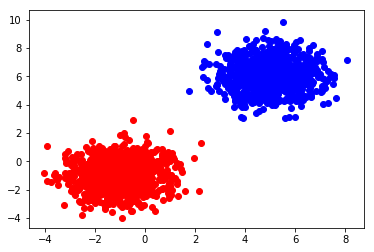

In [5]:
np.random.seed(42)
N = 1000
X = np.concatenate(([5, 6] + np.random.randn(N, 2), [-1, -1] + np.random.randn(N, 2)))
y = np.concatenate((np.ones(N), -np.ones(N)))

plt.scatter(X[y == -1,0], X[y == -1,1], color='r')
plt.scatter(X[y == 1,0], X[y == 1,1], color='b')

In [6]:
def plot_decision_boundary(w, b, xx):
    a = -w[0] / w[1] # slope of decision boundary
    # solve w_x * x + w_y*y + b = 0, for y
    yy2 = (-b - w[0]*xx)/w[1]

    margin = 1 / np.sqrt(np.sum(w ** 2))
    yy_down = yy2 - np.sqrt(1 + a ** 2) * margin
    yy_up = yy2 + np.sqrt(1 + a ** 2) * margin
#     plt.clf()
#     plt.plot(xx, yy, 'k-')
    plt.plot(xx, yy2, 'k--')
    plt.plot(xx, yy_down, 'k--')
    plt.plot(xx, yy_up, 'k--')
    plt.scatter(X[y == -1,0], X[y == -1,1], color='r', alpha=0.1)
    plt.scatter(X[y == 1,0], X[y == 1,1], color='b', alpha=0.1)

In [12]:
# suppress solver output
import sys
so = sys.stdout
sys.stdout = open('c:/TEMP_DEL/solver_output.log', 'w')

Call sample solution QP SVM.

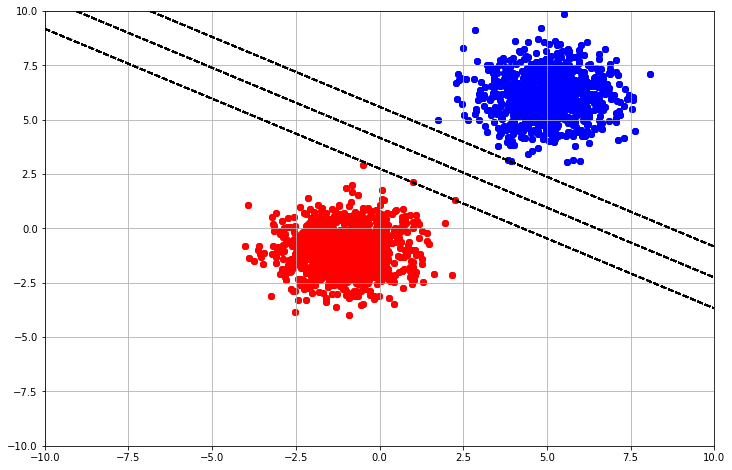

In [15]:
plt.figure(figsize=(12,8))
plt.xlim([-10.0, 10])
plt.ylim([-10, 10])
plt.grid()

for _ in range(30):
    p = sample_qp_hard_svm.QPHardSVM()
    p.fit(X, y)
    plot_decision_boundary(p.theta[0:2], p.theta[-1], np.linspace(-10, 10))

Call QP SVM.

NotImplementedError: 

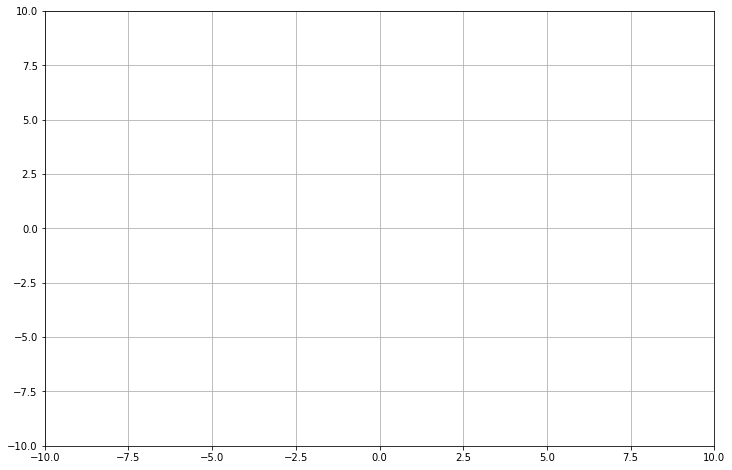

In [14]:
plt.figure(figsize=(12,8))
plt.xlim([-10.0, 10])
plt.ylim([-10, 10])
plt.grid()

for _ in range(30):
    p = qp_hard_svm.QPHardSVM()
    p.fit(X, y)
    plot_decision_boundary(p.theta[0:2], p.theta[-1], np.linspace(-10, 10))

In [7]:
sys.stdout = so